**Code Inspired from [Nicholas Renotte](https://m.youtube.com/c/NicholasRenotte)**

## Installing Dependencies

In [ ]:
# Installing PyTorch (Stable, Pip, CPU)
!pip3 install torch torchvision torchaudio

In [ ]:
# Installing ultralytics YOLOv5
!git clone https://github.com/ultralytics/yolov5

In [ ]:
# Installing YOLOv5 dependencies (from yolov5>requirements.txt)
!cd yolov5
!pip install -r requirements.txt

## Importing Libraries

In [1]:
import torch
import numpy as np
import cv2
import os
import time
from matplotlib import pyplot as plt

D:\HDD Files\Desktop\Power Detection\PyTorch_Training\final_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Sample Testing YOLOv5 Model

In [2]:
# Importing pre-trained yolov5 model from torch hub (https://pytorch.org/hub/ultralytics_yolov5/)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-29 Python-3.9.12 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


### Testing Sample Image on Pre-trained Model

In [4]:
img = 'https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2020/04/boston-streets-coronavirus-fb.jpg'

In [5]:
# Detecting objects in image (Boston, MA street)
results = model(img)
results.print()

image 1/1: 650x1200 7 persons, 5 cars, 1 traffic light, 1 fire hydrant, 1 potted plant, 1 clock
Speed: 198.1ms pre-process, 187.4ms inference, 0.0ms NMS per image at shape (1, 3, 352, 640)


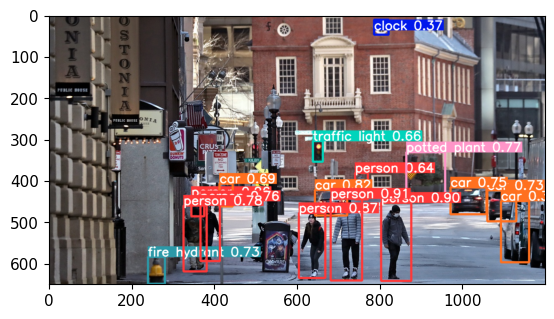

In [6]:
%matplotlib inline

rendered_image = results.render()

# np.squeeze removes single-dimensional entries from the dimensions of an array
# Used to extract the resolution of the image
plt.imshow(np.squeeze(rendered_image))
plt.show()

## Webcam Detections

In [7]:
# Finds webcam on PC (index may vary for different devices)
cam = cv2.VideoCapture(0)

# Turns webcam on
while cam.isOpened():
    rnet, frame = cam.read()
    
    # Make detections
    results = model(frame)
    
    # Shows result frame on webcam
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # Press 'q' to quit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()

## Training Custom Model

### Collecting Images Through WebCam

In [ ]:
# Path must be named as follow in order for YOLOv5 to work
# 'images' and 'labels' must be in same directory
IMAGES_PATH = os.path.join('data', 'images')
LABELS_PATH = os.path.join('data', 'labels')

# labels list includes labels of custom objects to be trained
labels = ['airchair']
# The number of images to capture per label
number_imgs = 10

# Creating missing path(s)
paths = [IMAGES_PATH, LABELS_PATH]
for path in paths:
    if not os.path.exists(path):
        !mkdir {path}

In [ ]:
cam = cv2.VideoCapture(0)
# Looping through labels
for label in labels:
    print(f'Collecting images for {label}')
    # Pause to get in position
    time.sleep(5)
    
    # Collecting desired number of images
    for img_num in range(number_imgs):
        print(f'Collecting images for {label}, image {img_num}')
        
        # Webcam feed
        ret, frame = cam.read()
        
        # Naming image path and writing to specified path
        img_name = os.path.join(IMAGES_PATH, label + str(img_num) + '.jpg')
        cv2.imwrite(img_name, frame)
        cv2.imshow('Image Collection', frame)
        
        # Delay between captures
        time.sleep(3)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cam.release()
cv2.destroyAllWindows()

In [ ]:
# Following commmands initate training (Note: dataset.yaml must be configured to match training set)
# (https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data)
!cd yolov5
!python train.py --img 320 --batch 16 --epochs 300 --data dataset.yaml --weights yolov5s.pt

## Load & Test Model

In [16]:
# Loading custom model
custom_model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2022-9-29 Python-3.9.12 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [17]:
# Set img path to test image
img = os.path.join('data', 'test', 'johnny3.jpg')
results = custom_model(img)
results.print()

image 1/1: 3000x4000 2 airchairs
Speed: 142.4ms pre-process, 234.4ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


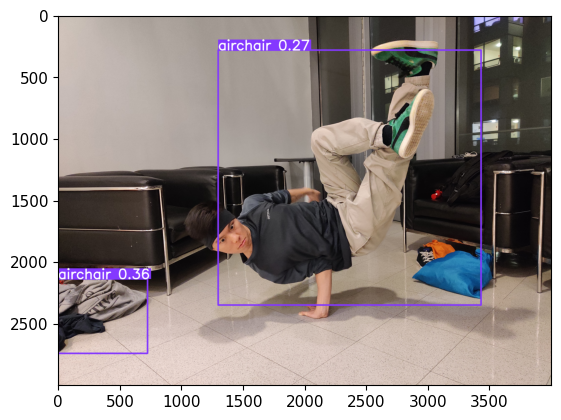

In [18]:
# Viewing tested image
%matplotlib inline
rendered_image = results.render()
plt.imshow(np.squeeze(rendered_image))
plt.show()